This notebook was created as part of coursework in University Pompeu Fabra's Machine Learning Course (MIIS)

The assignment explores the implementation of a Decision Tree Learning algorithm. 

In this notebook, we first generate a Decision Tree from Python's library and partition the dataset into a training set and a validation set. We report the total classification error of the resulting decision tree then repeat the same procedure on different partitions of the data, and make note of resulting differences in the resulting trees. 

Source Code:
• LIBSVM repository : http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/

• Decision trees visualization : https://github.com/parrt/dtreeviz

In [23]:
import numpy as np
import pandas as pd
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.externals.six import StringIO  
from IPython.display import Image  


In [24]:
#load data 
#the dataset used in this notebook is the mushrooms scaled classification dataset 
#https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/mushrooms

x, y = load_svmlight_file('users/your_username/path_dataset/mushrooms.svm')


FileNotFoundError: [Errno 2] No such file or directory: 'mushrooms.svm'

https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/mushrooms

In [ ]:
print(x)
print(y)

In [ ]:
#Split the data into training and testing

#first decision tree will be created from 20% of total data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


There are different metrics that are used as a basis for choosing which attributes to split on. 

Gini is intended for continuous attributes, and Entropy for attributes that occur in classes.
Gini will tend to find the largest class, and entropy tends to find groups of classes that make up ~50% of the data.
Gini to minimize misclassification.
Entropy for exploratory analysis.
Some studies show this doesn’t matter – these differ less than 2% of the time.
Entropy may be a little slower to compute.

In [25]:
#function to perform training with entropy
clf_entropy = DecisionTreeClassifier(criterion= "entropy", random_state= 100, max_depth=3, min_samples_leaf=10)

In [26]:
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [27]:
#function to make predictions
y_pred_entropy = clf_entropy.predict(x_test)
print(y_pred_entropy)

[2. 1. 1. ... 2. 2. 1.]


In [28]:
#check accuracy
print("Accuracy Score Criterion Entropy: :", accuracy_score(y_test, y_pred_entropy))

Accuracy Score Criterion Entropy: : 0.9587692307692308


In [29]:
#decision tree reporting error
clf_gini = DecisionTreeClassifier(criterion= "gini", random_state= 100, max_depth=20, min_samples_leaf=10)
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)
print(y_pred_gini)


[2. 1. 1. ... 2. 2. 1.]


In [30]:
#Total classification error
print("Accuracy Score Criterion Gini: :", accuracy_score(y_test, y_pred_gini))

Accuracy Score Criterion Gini: : 1.0


Accuracy Score Criterion Gini: : 1.0


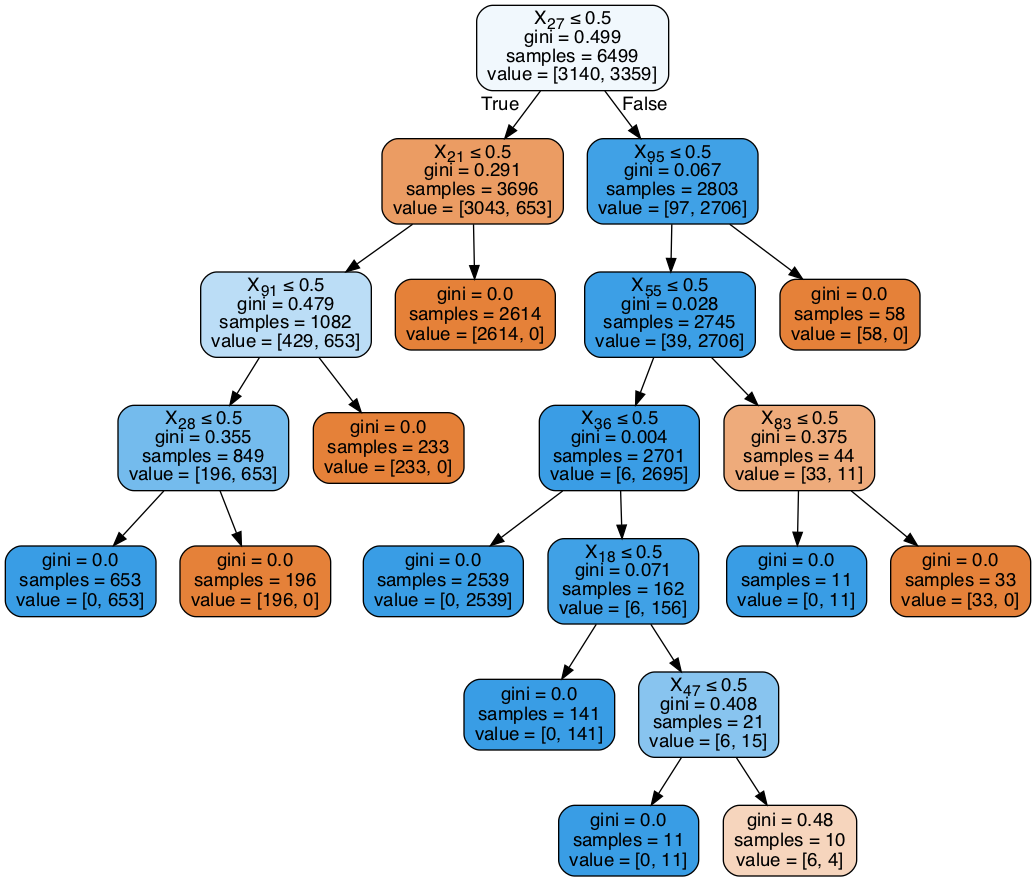

In [31]:
#print decision tree
print("Accuracy Score Criterion Gini: :", accuracy_score(y_test, y_pred_gini))
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Accuracy of second training set of 80% with Gini Criterion: :  99.6


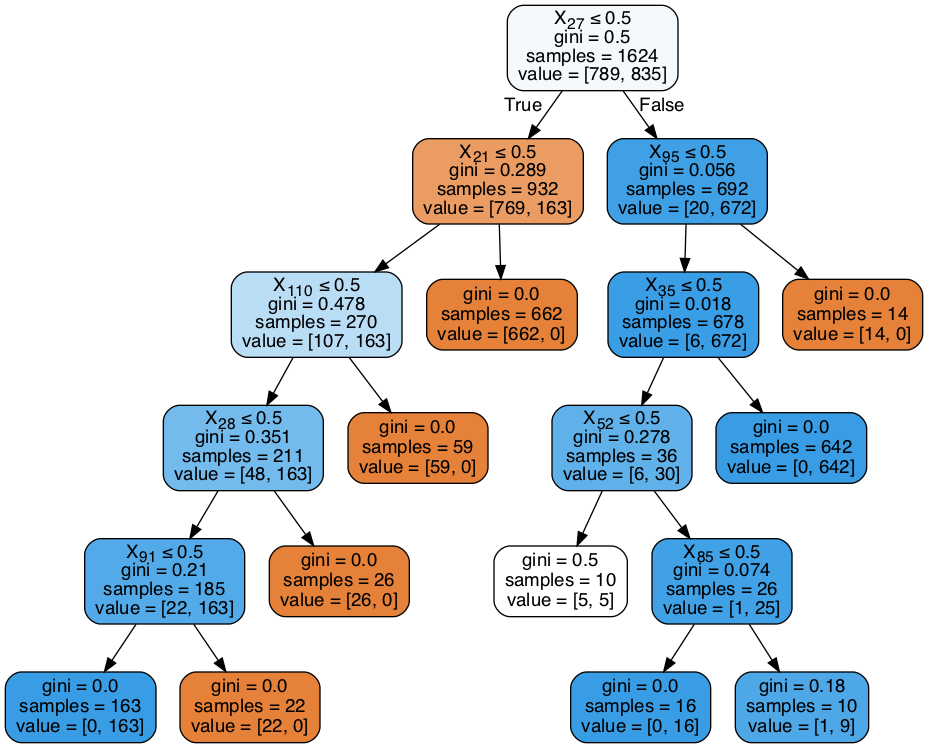

In [32]:
#create another decision tree with different partition of dataset
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.80)
clf_gini.fit(x_train2, y_train2)
y_pred_gini2 = clf_gini.predict(x_test2)
accuracy_gini2 = accuracy_score(y_test2,y_pred_gini2)*100
print("Accuracy of second training set of 80% with Gini Criterion: : ", accuracy_gini2)
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


# Theory

Why are the resulting decision trees very different? 

The resulting trees are different: Even though the Training/validation split is the same in both cases, the second tree has a much better out-of-sample accuracy of 80.5% versus the first tree which has an out of sample accuracy of 72%. we can also see that the decision tree is physically different, the values of the various decision paramaters are different which can result in a different physical tree.

These differences are due to the fact that Decision Trees can be extremely sensitive to small changes in the data. So we see that a slight change in the training data can result in a drastically different tree. Examining the two trees we can see that the decision values on the various decision nodes are indeed different.

The decision tree can also easily overfit or have problems out-of-sample prediction. This could potentially be negated by validation methods and pruning but this has not been covered in the exercise. The first tree in this particular report may have overfitted as the in sample accuracy is significantly higher than the out of sample accuracy.

The Gini algorithm we have used to construct the tree works from top-down, by choosing a variable at each step that best splits the Items. Different algorithms use different metrics for measuring "best". This metric is applied to each candidate subset and the resulting values are combined (for example averaged) to provide a measure of the quality of the split. The Gini value is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. The Gini impurity can be computed by summing the probability P(i) of an item with label i being chosen times the probability 1-p(i) of a mistake in categorising the item. It reaches its minimum (zero) when all cases in the node fall into a single target category.